In [6]:
import time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sum_matrix(matrix1,matrix2):
    tempo_inicial= time.time()
    L= matrix1.shape[0]
    if matrix1.shape == matrix2.shape:
        matrix_sqr= np.zeros((matrix1.shape[0],matrix2.shape[1]))
        for i in range(L):
            for j in range(L):
                matrix_sqr[i,j]= matrix1[i,j]+matrix2[i,j]
    else:
        raise ValueError('As matrizes não podem ser somadas pois possuem dimenções diferentes')
    tempo_final= time.time()
    return tempo_final-tempo_inicial
            

In [3]:
tempo_de_execução= {'Tamanho_da_Matrix':[],
                    'Tempo_de_execução':[],
                    }

for i in range(9):
    n= 3**i
    matrix_a= np.random.randint(0,10,size=(3**i,3**i))
    matrix_b=np.random.randint(0,10,size=(3**i,3**i))
    tempo_de_execução['Tamanho_da_Matrix'].append(n)
    tempo_de_execução['Tempo_de_execução'].append(sum_matrix(matrix_a,matrix_b))


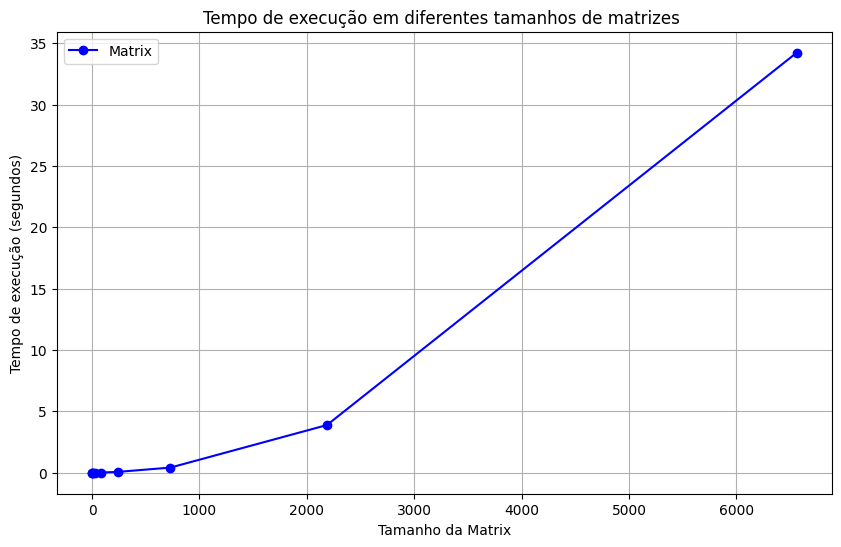

In [7]:
# Criando o gráfico
plt.figure(figsize=(10, 6))

plt.plot(tempo_de_execução['Tamanho_da_Matrix'], tempo_de_execução['Tempo_de_execução'], label="Matrix", marker='o', color='b')


plt.xlabel("Tamanho da Matrix")
plt.ylabel("Tempo de execução (segundos)")
plt.title("Tempo de execução em diferentes tamanhos de matrizes ")

plt.legend()
plt.grid(True)

plt.show()